## Algorithm Overview
In this notebook, we employ **Gradient Boosting**

### How Gradient Boosting Works:
- **Boosting Framework**: Combines multiple weak learners (typically decision trees) to form a strong predictive model.
- **Gradient Descent Optimization**: Minimizes the loss function by iteratively improving model predictions.

### Advantages of Gradient Boosting:
- **Handles Non-Linearity**: Effectively models non-linear relationships in the data.
- **Feature Importance**: Provides insights into which features contribute most to predictions.
- **Customization**: Allows for flexible adjustments through hyperparameters like learning rate, number of estimators, and tree depth.

### Hyperparameter Tuning:
The model is optimized using **Grid Search** with the following hyperparameters:
- **Learning Rate**: Determines the contribution of each tree to the final prediction.
- **Number of Estimators**: Controls the number of trees in the ensemble.
- **Max Depth**: Restricts the depth of each tree to prevent overfitting.
- **Min Samples Split/Leaf**: Sets thresholds for tree splits to control complexity.

### Evaluation Metrics:
The model's performance is assessed using:
- **F1 Score**: A weighted measure of precision and recall.
- **Classification Report**: Detailed metrics for each class.
- **Confusion Matrix**: Insights into the model's accuracy for each class.

### Visualization:
To enhance interpretability, we include the following visualizations:
1. **F1 Scores per Class**: A bar plot showing the F1 score for each class.
2. **Confusion Matrix**: A heatmap illustrating prediction accuracy.
3. **Feature Importance**: A bar chart displaying the relative importance of features.

This approach ensures a thorough understanding of the model's strengths and limitations while leveraging Gradient Boosting's robust capabilities for multi-class classification.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
data_train = pd.read_csv("Final_Version_data_breast.csv")
data_test = pd.read_csv("Test_Set.csv")

X_train = data_train.drop(columns=["cancer_type"])
y_train = data_train["cancer_type"]
y_train = pd.Categorical(y_train).codes

X_test = data_test.drop(columns=["cancer_type"])
y_test = data_test["cancer_type"]
y_test = pd.Categorical(y_test).codes

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

grid_search_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
grid_search_gb.fit(X_train, y_train)
best_model_gb = grid_search_gb.best_estimator_

y_pred = best_model_gb.predict(X_test)

In [4]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_report(y_test, y_pred))

classes = [f"Class {i}" for i in np.unique(y_test)]
f1_scores = f1_score(y_test, y_pred, average=None)

F1 Score: 0.9365921231466989
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90       259
           1       0.94      0.87      0.90       225
           2       0.96      0.93      0.94       228
           3       0.99      1.00      0.99       248

    accuracy                           0.94       960
   macro avg       0.94      0.93      0.94       960
weighted avg       0.94      0.94      0.94       960



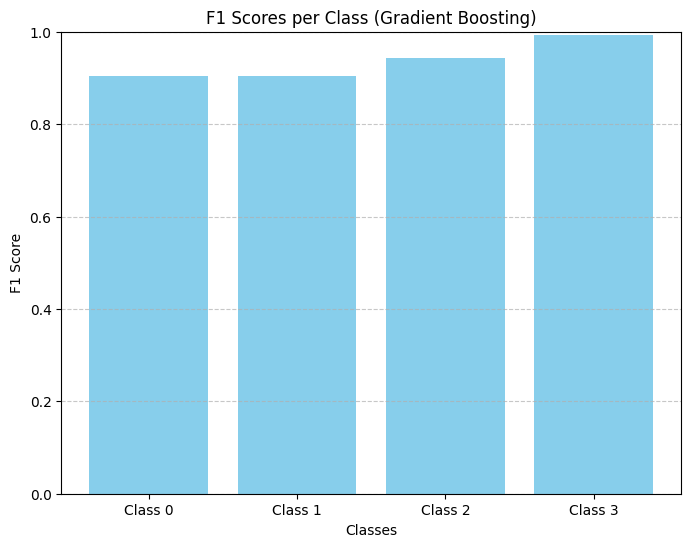

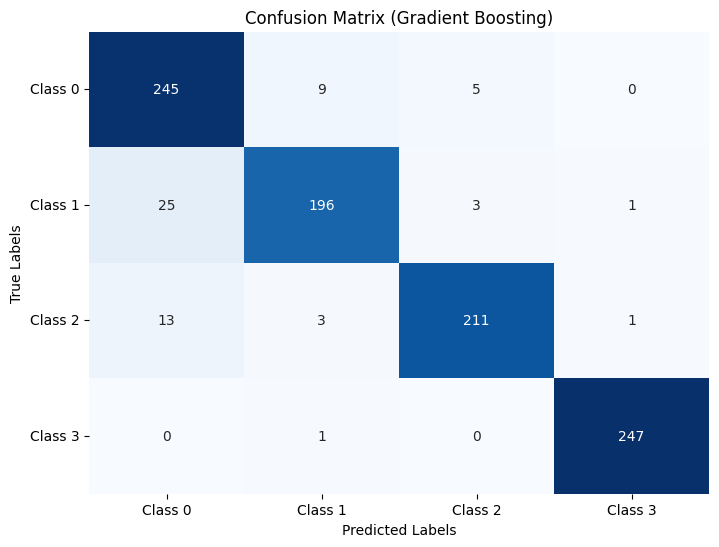

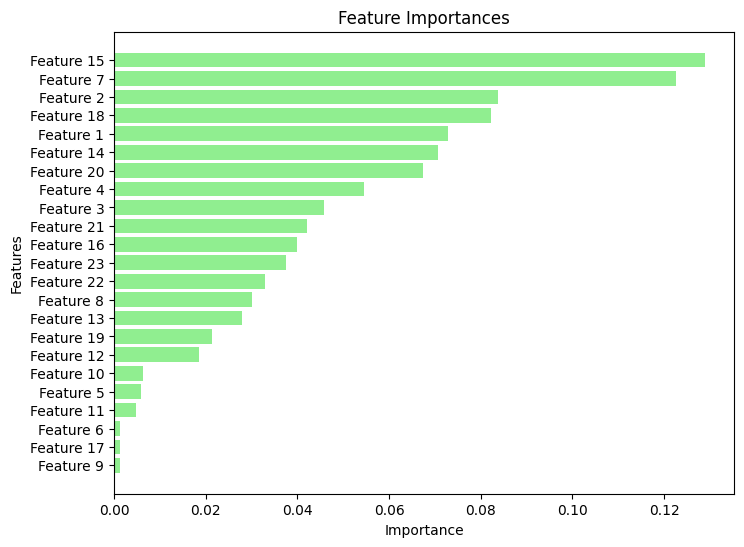

In [5]:

plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores, color='skyblue')
plt.title("F1 Scores per Class (Gradient Boosting)")
plt.xlabel("Classes")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Gradient Boosting)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes, rotation=0)
plt.show()

feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]
feature_importances = best_model_gb.feature_importances_
plt.figure(figsize=(8, 6))
sorted_indices = np.argsort(feature_importances)[::-1]
plt.barh(range(len(feature_importances)), np.array(feature_importances)[sorted_indices], align='center', color='lightgreen')
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()
